In [304]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects

In [305]:
csv_path = "C:/Users/chuck/OneDrive/Desktop/Honors/class_weight_dataset/labels_orig.csv"
original_df = pd.read_csv(csv_path, index_col=False)

In [306]:
import matplotlib.gridspec as gridspec

def display_pie_charts(dataframe, column_names):
    if len(column_names) != 3:
        raise ValueError("Exactly three column names are required.")

    common_labels = ['0', '0.33', '0.66', '1']
    font1 = {'family': 'georgia', 'size': 20}
    font2 = {'family': 'georgia', 'size': 16}

    fig = plt.subplots(1, 4, figsize=(20, 5))
    gs = gridspec.GridSpec(1, 4, width_ratios=[1, 1, 1, 0.5])

    for i, column_name in enumerate(column_names):
        # Count the unique values in the specified column
        sorted_df = dataframe.sort_values(by=column_name, ascending=True)
        value_counts = sorted_df[column_name].value_counts()
        value_counts = value_counts.sort_index(ascending=True)
        # Extract labels and counts for the pie chart
        counts = value_counts.values
        print(value_counts)

        # Create a pie chart
        ax = plt.subplot(gs[i])
        ax.pie(counts, autopct='%1.0f%%', startangle=140, textprops=font2, pctdistance=0.8)
        ax.set_title(f'Unique Values in {column_name}', fontdict=font1)

    # Create a separate subplot for the legend
    # legend_ax = plt.subplot(gs[3])
    # legend_ax.axis('off')  # Turn off the axis for the legend subplot
    legend = ax.legend(common_labels, title='Score', loc='center', prop=font2, labels=common_labels, bbox_to_anchor=(1.25, 0.5))
    legend.get_title().set_fontproperties(font1)
    plt.subplots_adjust(wspace=-0.6)

    # Display the pie charts
    plt.show()

0.00    1128
0.33     948
0.66    1660
1.00    6156
Name: good, dtype: int64
0.00    7596
0.33     916
0.66     420
1.00     960
Name: crack, dtype: int64
0.00    8680
0.33     496
0.66     384
1.00     332
Name: corrossion, dtype: int64


C:\Users\chuck\AppData\Local\Temp\ipykernel_11736\1883573846.py:31: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  legend = ax.legend(common_labels, title='Score', loc='center', prop=font2, labels=common_labels, bbox_to_anchor=(1.25, 0.5))


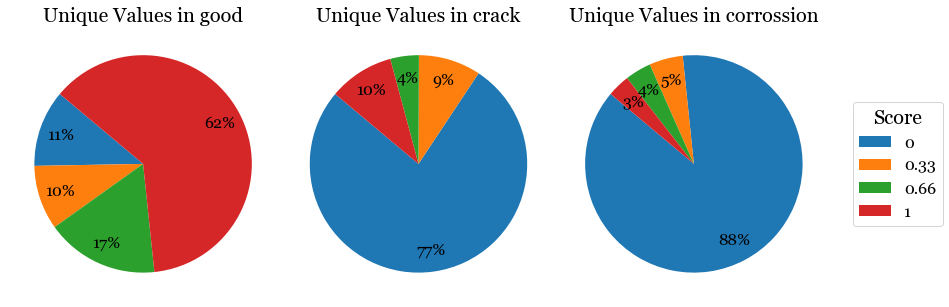

In [307]:
display_pie_charts(original_df, ["good", 'crack', 'corrossion'])

In [308]:
delete_frac = 0.8

0       False
1       False
2        True
3       False
4       False
        ...  
9887     True
9888     True
9889     True
9890     True
9891     True
Length: 9892, dtype: bool
<class 'numpy.float64'>
0.00    1128
0.33     948
0.66    1660
1.00    1558
Name: good, dtype: int64
0.00    2998
0.33     916
0.66     420
1.00     960
Name: crack, dtype: int64
0.00    4082
0.33     496
0.66     384
1.00     332
Name: corrossion, dtype: int64


C:\Users\chuck\AppData\Local\Temp\ipykernel_11736\1883573846.py:31: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  legend = ax.legend(common_labels, title='Score', loc='center', prop=font2, labels=common_labels, bbox_to_anchor=(1.25, 0.5))


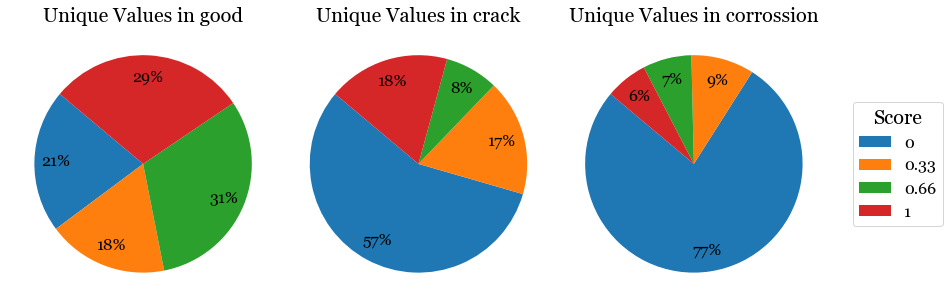

In [309]:
def randomly_delete_entries(dataframe, frac):
    # Identify rows where the first column is '1' and the other two columns are '0'
    mask = (dataframe.iloc[:, 1] == 1.0) & (dataframe.iloc[:, 2] == 0.0) & (dataframe.iloc[:, 3] == 0.0)
    print(mask)
    print(type(dataframe.iloc[:, 3][1]))
    # Randomly delete some of the identified rows
    rows_to_delete = dataframe[mask].sample(frac=frac)  # You can adjust the fraction as needed
    modified_dataframe = dataframe.drop(rows_to_delete.index)

    return modified_dataframe

new_df = randomly_delete_entries(original_df, delete_frac)
display_pie_charts(new_df, ["good", 'crack', 'corrossion'])

In [310]:
new_df.to_csv("slim_dataset.csv", index=False, sep=',')

In [312]:
def calculate_class_weights(dataframe, target_column):
    class_frequencies = dataframe[target_column].value_counts()
    num_classes = len(class_frequencies)
    total_samples = dataframe.shape[0]

    # Calculate class weights as inversely proportional to class frequencies
    class_weights = {class_label: total_samples / (num_classes * count) for class_label, count in class_frequencies.items()}

    return class_weights

print(calculate_class_weights(new_df, "crack"))

{0.0: 0.4414609739826551, 1.0: 1.3786458333333333, 0.33: 1.4448689956331877, 0.66: 3.151190476190476}
